In [ ]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from scipy import stats
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.DataFrame({
    'Memory': [5, 5, 6, 6, 7, 7, 7, 8, 9, 9, 10, 4, 11, 13, 13, 13, 16, 16, 19, 20],
    'Anxiety': [20, 21, 24, 32, 32, 21, 45, 45, 31, 22, 44, 45, 46, 49, 45, 60, 56, 57, 48, 41],
    'Depression': [0, 0, 0, 1, 1, 1, 3, 3, 5, 8, 6, 6, 7, 8, 10, 16, 20, 13, 28, 24],
    'Self_Esteem': [16, 15, 19, 18, 17, 18, 16, 10, 15, 15, 14, 13, 15, 12, 10, 9, 2, 2, 12, 1]
})

df2 = pd.DataFrame({
    'Therapy': np.repeat(['New', 'Old'] * 3, 4),
    'Duration': np.repeat(['Short-term'] * 4 + ['Medium-term'] * 4 + ['Long-term'] * 4, 2),
    'Improvement': [6, 9, 8, 5, 10, 11, 5, 9, 15, 18, 16, 20, 9, 12, 13, 9, 10, 12, 9, 13, 8, 7, 9, 12]
})

# split dataset by space
df3 = pd.read_csv('housing.csv', sep=' ', error_bad_lines=False)
df4 = pd.DataFrame(pd.read_csv('data.csv'))

<ipython-input-18-bf8d8c103f81>:31: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df3 = pd.read_csv('housing.csv', sep=' ', error_bad_lines=False)
Skipping line 42: expected 31 fields, saw 32
Skipping line 43: expected 31 fields, saw 32
Skipping line 44: expected 31 fields, saw 32



In [ ]:
df1

,Memory,Anxiety,Depression,Self_Esteem
0,5,20,0,16
1,5,21,0,15
2,6,24,0,19
3,6,32,1,18
4,7,32,1,17
5,7,21,1,18
6,7,45,3,16
7,8,45,3,10
8,9,31,5,15
9,9,22,8,15


In [ ]:
# (a) Correlation
correlation_matrix = df1.corr()
print("Correlation Matrix:\n", correlation_matrix)

# (b) Multiple Regression
X = df1[['Anxiety', 'Depression', 'Self_Esteem']]
Y = df1['Memory']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

# (c) Prediction for specific values
new_data = pd.DataFrame({'const': 1, 'Anxiety': [44], 'Depression': [13], 'Self_Esteem': [12]})
predicted_memory = model.predict(new_data)
print("\nPredicted Memory Bias with an Anxiety score of 44, a Depression score of 13 and a Self-Esteem score of 12:", predicted_memory[0])

# (d) Best Predictor

# Extract p-values and coefficients
p_values = model.pvalues
coefficients = model.params

# Identify the predictor with the lowest p-value
best_predictor = p_values.idxmin()

print(f"\nThe best predictor is: {best_predictor} with a p-value of {p_values[best_predictor]}")

# (e) Hierarchical Regression for Anxiety as Salient Predictor
# Create two models: one with only Anxiety and another with Anxiety, Depression, and Self-Esteem
model_anxiety = sm.OLS(Y, X[['const', 'Anxiety']]).fit()
model_all = sm.OLS(Y, X).fit()

# Compare the two models
print("\nModel with Anxiety only:")
print(model_anxiety.summary())

print("\nModel with Anxiety, Depression, and Self-Esteem:")
print(model_all.summary())

Correlation Matrix:
                Memory   Anxiety  Depression  Self_Esteem
Memory       1.000000  0.631711    0.925598    -0.786000
Anxiety      0.631711  1.000000    0.624016    -0.678946
Depression   0.925598  0.624016    1.000000    -0.746602
Self_Esteem -0.786000 -0.678946   -0.746602     1.000000
                            OLS Regression Results                            
Dep. Variable:                 Memory   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     38.11
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.63e-07
Time:                        09:58:37   Log-Likelihood:                -38.112
No. Observations:                  20   AIC:                             84.22
Df Residuals:                      16   BIC:                             88.21
Df Model:                           3                         

Most positively correlated variable is Memory and Depression. It is also best predictor for Memory Bias with small p value. Almost 87% (R2) of the Memory Bias variance is accounted by regression model.

In model with Anxiety only it is a significant predictor of Memory Bias (p = 0.003).The model with Anxiety only explains 39.9% of the variance in Memory Bias. On the other hand model with other factors Anxiety has lesser significance but R2 is still 87% so it might effect that metric.

In [ ]:
df2

,Therapy,Duration,Improvement
0,New,Short-term,6
1,New,Short-term,9
2,New,Short-term,8
3,New,Short-term,5
4,Old,Short-term,10
5,Old,Short-term,11
6,Old,Short-term,5
7,Old,Short-term,9
8,New,Medium-term,15
9,New,Medium-term,18


Means:
                      Improvement
Therapy Duration                
New     Long-term          11.00
        Medium-term        17.25
        Short-term          7.00
Old     Long-term           9.00
        Medium-term        10.75
        Short-term          8.75

Standard Deviations:
                      Improvement
Therapy Duration                
New     Long-term       1.825742
        Medium-term     2.217356
        Short-term      1.825742
Old     Long-term       2.160247
        Medium-term     2.061553
        Short-term      2.629956

ANOVA Table:
                          sum_sq    df          F    PR(>F)
C(Therapy)               30.375   1.0   6.647416  0.018945
C(Duration)             154.750   2.0  16.933131  0.000073
C(Therapy):C(Duration)   68.250   2.0   7.468085  0.004349
Residual                 82.250  18.0        NaN       NaN


<ipython-input-5-918995033f0c>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Duration', y='Improvement', hue='Therapy', data=df2, ci=None)


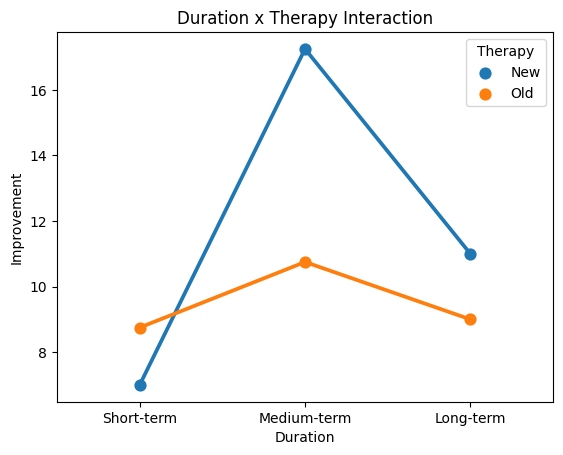

<ipython-input-5-918995033f0c>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Therapy', y='Improvement', hue='Duration', data=df2, ci=None)


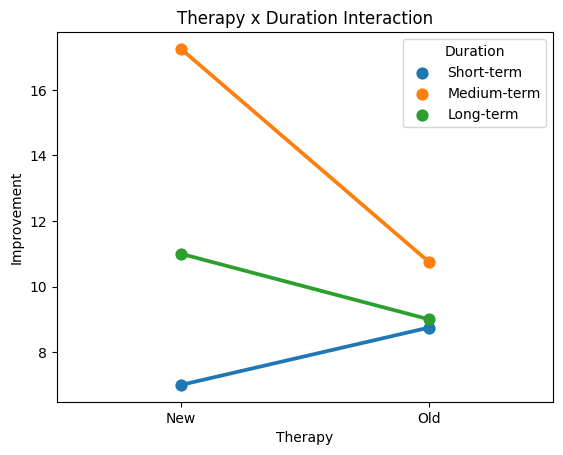

In [ ]:
# Means and Standard Deviations
means = df2.groupby(['Therapy', 'Duration']).mean()
sds = df2.groupby(['Therapy', 'Duration']).std()
print("Means:\n", means)
print("\nStandard Deviations:\n", sds)

# ANOVA
model = ols('Improvement ~ C(Therapy) + C(Duration) + C(Therapy):C(Duration)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:\n", anova_table)

# Interaction Plots
sns.pointplot(x='Duration', y='Improvement', hue='Therapy', data=df2, ci=None)
plt.title('Duration x Therapy Interaction')
plt.show()

sns.pointplot(x='Therapy', y='Improvement', hue='Duration', data=df2, ci=None)
plt.title('Therapy x Duration Interaction')
plt.show()

# Simple Effects Analysis

The most significant factor on Imporovement is Duration of therapy.

Duration had most increase in therapy improvement in medium-term for New method. We can see that its the best therapy. It is also least correlated regarding old and new method.
Only short-term therapy increased between new and old method.
Long-term thepary has least change between old and new method.

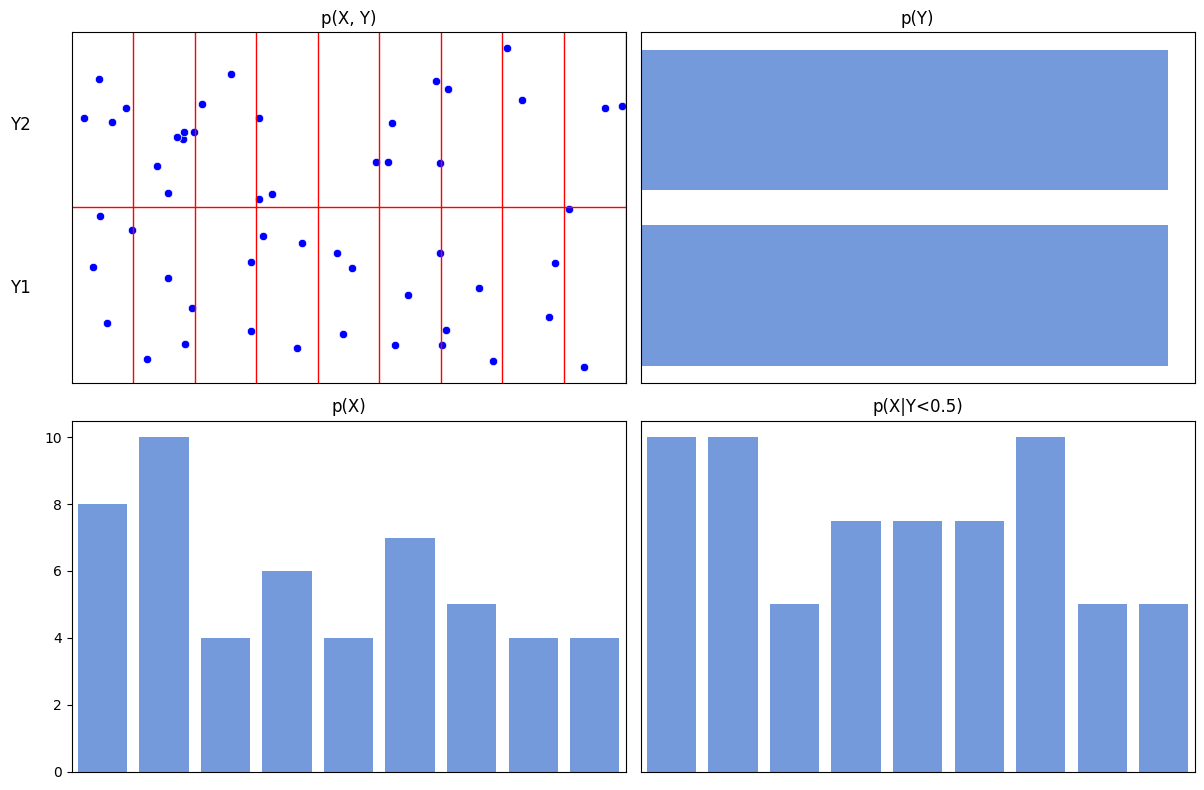

In [ ]:
# Generating random float data
np.random.seed(42)
size = 60
X = np.random.uniform(0, 1, size=size)
Y = np.random.uniform(0, 1, size=size)

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})
data1 = data.copy()

# Add a new column 'Category' based on Y values
data1['Category'] = np.where(data1['Y'] >= 0.5, 'Y2', 'Y1')

# Create a subplot with a count plot
plt.figure(figsize=(12, 8))

# Scatter plot with different colors for Y=1 and Y=2
plt.subplot(2, 2, 1)
sns.scatterplot(x='X', y='Y', data=data1, color='b')
for i in range(1, 10):
    plt.axvline(x=i / 10, color='red', linestyle='-', linewidth=1)  # Vertical line
plt.axhline(y=0.5, color='red', linestyle='-', linewidth=1)  # Horizontal line

plt.title('p(X, Y)')
plt.text(-0.1, 0.75, 'Y2', color='black', va='center', ha='left', fontsize=12)
plt.text(-0.1, 0.25, 'Y1', color='black', va='center', ha='left', fontsize=12)
plt.ylabel('')
plt.xlabel('')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.xlim(0, 0.9)  # Limit x-axis range

cols = [0] * 9
cols1 = [0] * 9
ints = [1, 2, 3, 4, 5, 6, 7, 8, 9]
intervals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Create additional columns for each interval
for i in range(9):
    for j in range(60):
        cols[i] += (data['X'].at[j] >= intervals[i]) & (data['X'].at[j] < intervals[i+1])
        if data1['Y'].at[j] < 0.5:
            cols1[i] += (data['X'].at[j] >= intervals[i]) & (data['X'].at[j] < intervals[i+1])

# Create a DataFrame from the list of counts
df_cols = pd.DataFrame({'Count': cols})
df_cols1 = pd.DataFrame({'Count': cols1})

# Create a horizontal count plot showing the number of points above and below 0.5 for Y
plt.subplot(2, 2, 2)
sns.countplot(y='Category', data=data1, orient='horizontal', color='cornflowerblue')
plt.title('p(Y)')
plt.ylabel('')
plt.xlabel('')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Plot marginal distribution P(X) with 9 columns
plt.subplot(2, 2, 3)
sns.barplot(x=ints, y=df_cols['Count'], color='cornflowerblue')  # Use ints for x-axis
plt.title('p(X)')
plt.ylabel('')
plt.xlabel('')
plt.xticks([])  # Remove x-axis ticks

# Plot conditional distribution P(X|Y=1)
plt.subplot(2, 2, 4)
sns.barplot(x=ints, y=df_cols1['Count'], color='cornflowerblue')  # Adjust bins to 9
plt.title('p(X|Y<0.5)')
plt.ylabel('')
plt.xlabel('')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.tight_layout()
plt.show()


In [ ]:
df3.columns = [str(i) for i in range(1, len(df3.columns) + 1)]
df3 = df3.fillna(0)
df3

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
NaN,0.02731,0.0,0.0,0.0,0.0,0.00,7.07,0.0,0.0,0.000,...,0.0,242.0,0.0,17.80,396.90,0.0,0.00,9.14,0.0,21.6
NaN,0.02729,0.0,0.0,0.0,0.0,0.00,7.07,0.0,0.0,0.000,...,0.0,242.0,0.0,17.80,392.83,0.0,0.00,4.03,0.0,34.7
NaN,0.03237,0.0,0.0,0.0,0.0,0.00,2.18,0.0,0.0,0.000,...,0.0,222.0,0.0,18.70,394.63,0.0,0.00,2.94,0.0,33.4
NaN,0.06905,0.0,0.0,0.0,0.0,0.00,2.18,0.0,0.0,0.000,...,0.0,222.0,0.0,18.70,396.90,0.0,0.00,5.33,0.0,36.2
NaN,0.02985,0.0,0.0,0.0,0.0,0.00,2.18,0.0,0.0,0.000,...,0.0,222.0,0.0,18.70,394.12,0.0,0.00,5.21,0.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.06263,0.0,0.0,0.0,0.0,11.93,0.00,0.0,0.0,0.573,...,273.0,0.0,21.0,391.99,0.00,0.0,9.67,0.00,22.4,0.0
NaN,0.04527,0.0,0.0,0.0,0.0,11.93,0.00,0.0,0.0,0.573,...,273.0,0.0,21.0,396.90,0.00,0.0,9.08,0.00,20.6,0.0
NaN,0.06076,0.0,0.0,0.0,0.0,11.93,0.00,0.0,0.0,0.573,...,273.0,0.0,21.0,396.90,0.00,0.0,5.64,0.00,23.9,0.0
NaN,0.10959,0.0,0.0,0.0,0.0,11.93,0.00,0.0,0.0,0.573,...,273.0,0.0,21.0,393.45,0.00,0.0,6.48,0.00,22.0,0.0


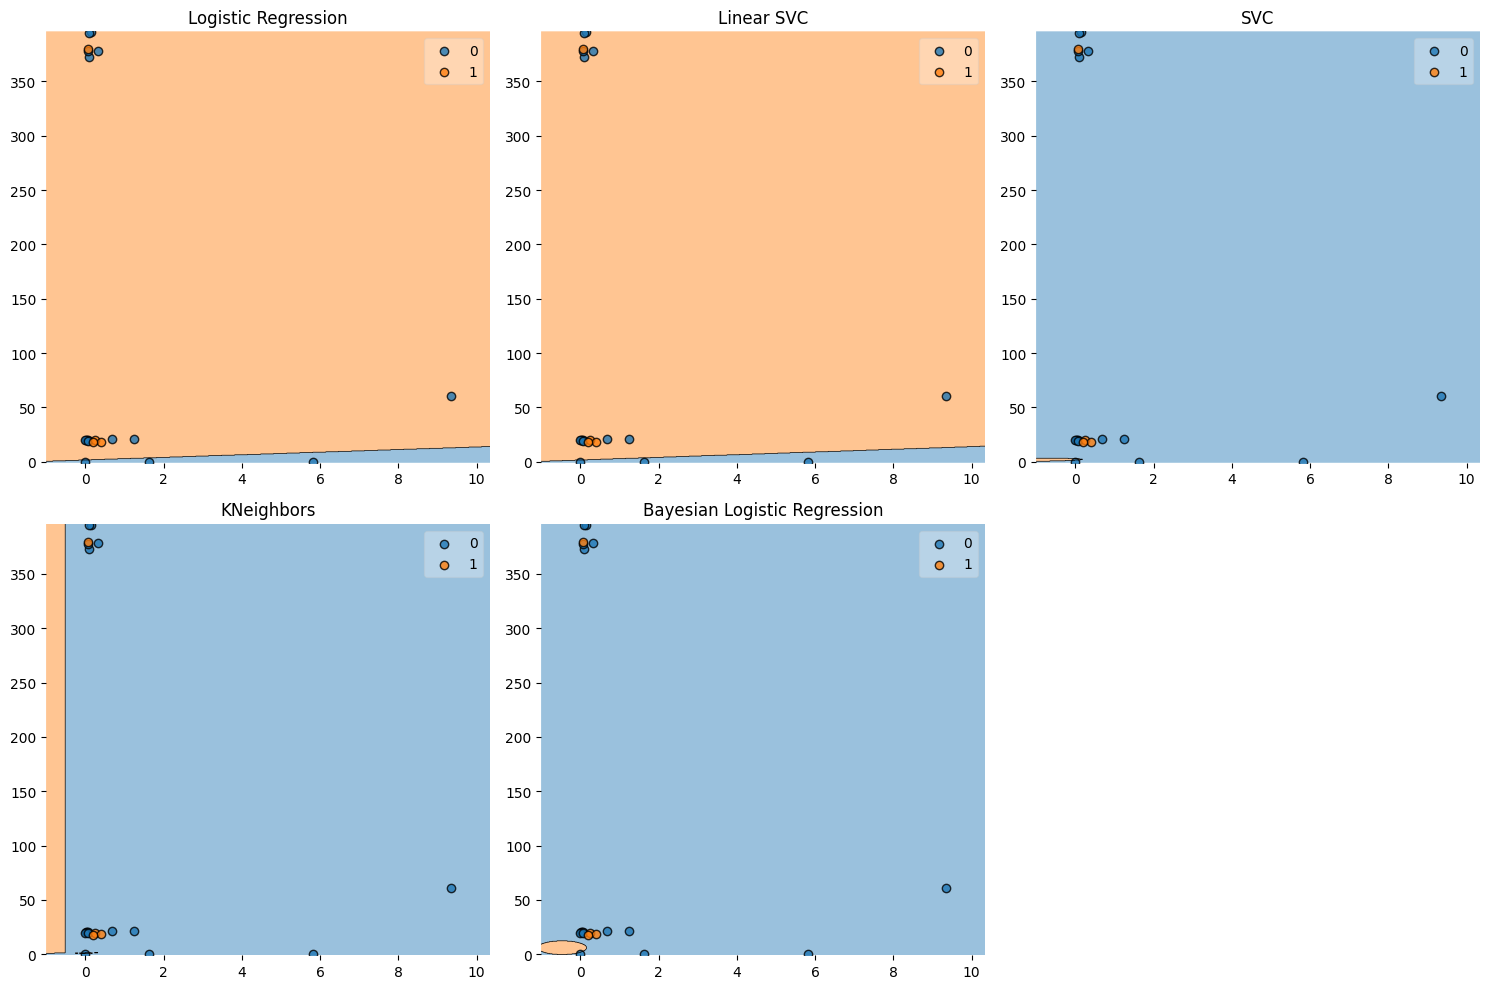

In [ ]:
# Adding column names
df3['1'] = pd.to_numeric(df3['1'], errors='coerce')
df3['24'] = pd.to_numeric(df3['24'], errors='coerce')
df3['29'] = pd.to_numeric(df3['29'], errors='coerce')

# Create binary groups based on specified conditions
df3.loc[df3['1'] < 0.5, 'Group1'] = 0
df3.loc[df3['1'] >= 0.5, 'Group1'] = 1
df3.loc[df3['24'] < 20, 'Group2'] = 0
df3.loc[df3['24'] >= 20, 'Group2'] = 1
df3.loc[df3['29'] < 20, 'Group3'] = 0
df3.loc[df3['29'] >= 20, 'Group3'] = 1

# Extract features and target variable
X = df3[['29', '24']]
y = df3['Group1']

# Convert y to a NumPy array
y = y.values.astype(int)
X = X.values.astype(float)  # assuming your features are numeric

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
clf_lr = LogisticRegression()
clf_svc_linear = LinearSVC()
clf_svc = SVC()
clf_knn = KNeighborsClassifier()
clf_nb = GaussianNB()

# Train classifiers
clf_lr.fit(X_train_scaled, y_train)
clf_svc_linear.fit(X_train_scaled, y_train)
clf_svc.fit(X_train_scaled, y_train)
clf_knn.fit(X_train_scaled, y_train)
clf_nb.fit(X_train_scaled, y_train)

# Plot decision boundaries
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Use a subset for visualization
subset_size = 20
X_subset = X_train[:subset_size]
y_subset = y_train[:subset_size]

# Plot decision boundaries for each classifier
plot_decision_regions(X_subset, y_subset, clf_lr, ax=axes[0, 0], markers='o')
axes[0, 0].set_title('Logistic Regression')

plot_decision_regions(X_subset, y_subset, clf_svc_linear, ax=axes[0, 1], markers='o')
axes[0, 1].set_title('Linear SVC')

plot_decision_regions(X_subset, y_subset, clf_svc, ax=axes[0, 2], markers='o')
axes[0, 2].set_title('SVC')

plot_decision_regions(X_subset, y_subset, clf_knn, ax=axes[1, 0], markers='o')
axes[1, 0].set_title('KNeighbors')

plot_decision_regions(X_subset, y_subset, clf_nb, ax=axes[1, 1], markers='o')
axes[1, 1].set_title('Bayesian Logistic Regression')

# Hide empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

From those plots we can acknowlede that model predicts class 0 - the blue color more often than class 1 yellow. The model works preety fine but it have difficuties with extracting only one class from another. Model manages to predict class 1 - yellow only on Bayesan Logistic Regression with preety close prediction to yellow dots.

In [ ]:
df4

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


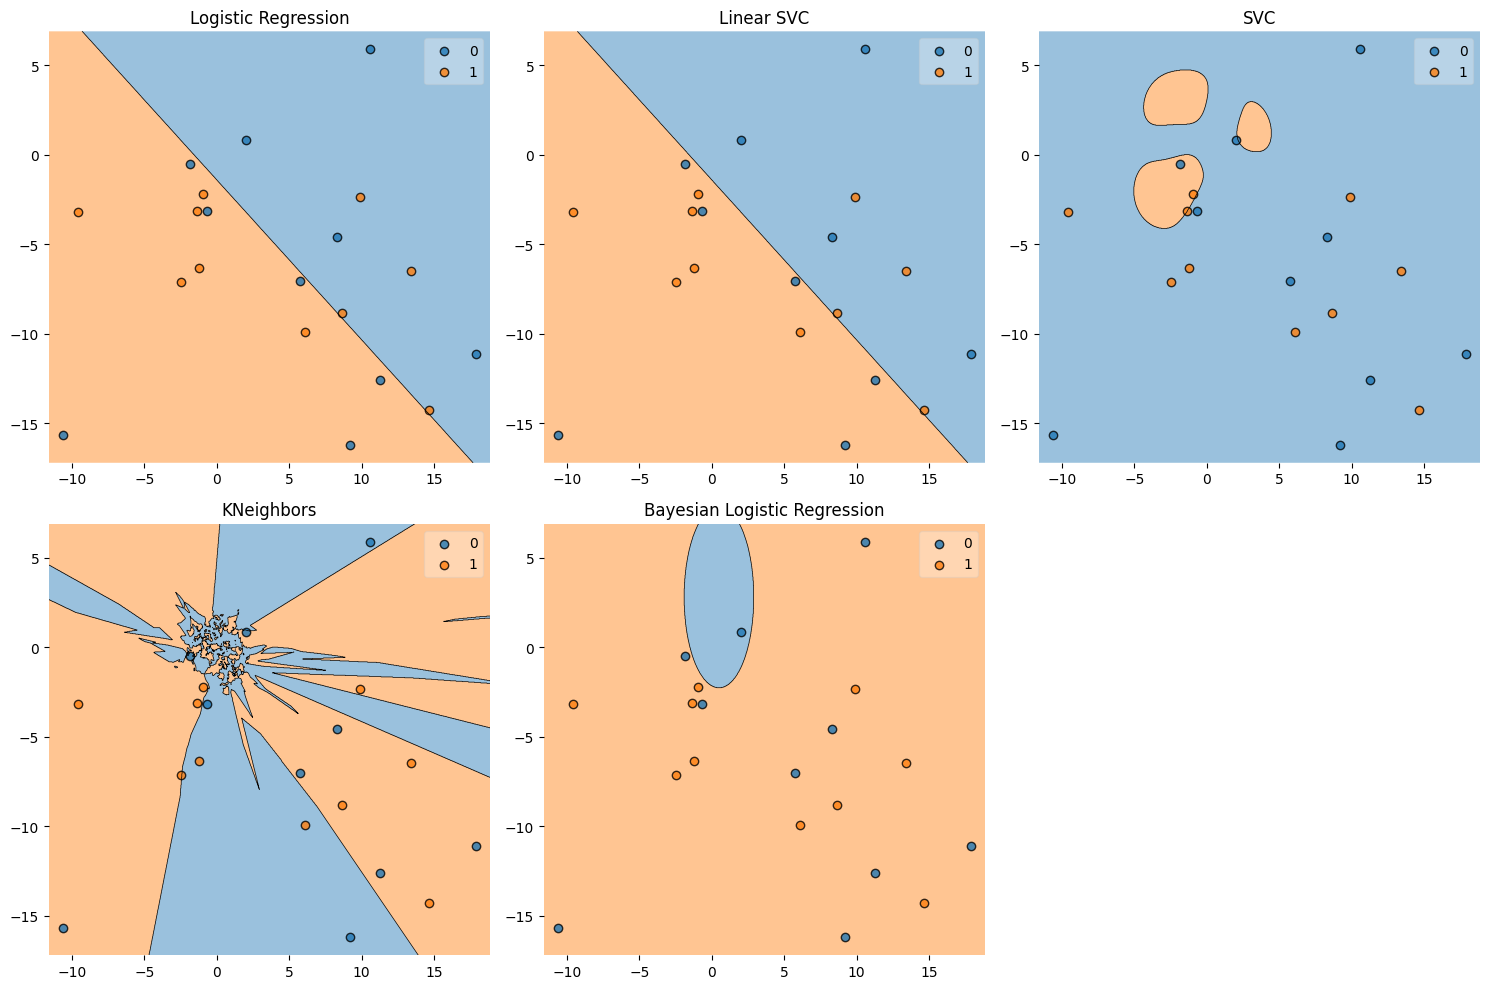

In [ ]:
df4.loc[df4['tempo'] < 120, 'tempoGroup'] = 0
df4.loc[df4['tempo'] >= 120, 'tempoGroup'] = 1

# Extract features and target variable
X1 = df4[['mfcc12', 'mfcc13']]
y1 = df4['tempoGroup']

# Convert y1 to NumPy array
y1 = y1.values.astype(int)
X1 = X1.values.astype(float)

# Split into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Initialize and train classifiers
clf_lr.fit(X_train_scaled1, y_train1)
clf_svc_linear.fit(X_train_scaled1, y_train1)
clf_svc.fit(X_train_scaled1, y_train1)
clf_knn.fit(X_train_scaled1, y_train1)
clf_nb.fit(X_train_scaled1, y_train1)

# Plot decision boundaries
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Use a subset for visualization
subset_size = 20
X_subset = X_train1[:subset_size]
y_subset = y_train1[:subset_size]

# Plot decision boundaries for each classifier
plot_decision_regions(X_subset, y_subset, clf_lr, ax=axes[0, 0], markers='o')
axes[0, 0].set_title('Logistic Regression')

plot_decision_regions(X_subset, y_subset, clf_svc_linear, ax=axes[0, 1], markers='o')
axes[0, 1].set_title('Linear SVC')

plot_decision_regions(X_subset, y_subset, clf_svc, ax=axes[0, 2], markers='o')
axes[0, 2].set_title('SVC')

plot_decision_regions(X_subset, y_subset, clf_knn, ax=axes[1, 0], markers='o')
axes[1, 0].set_title('KNeighbors')

plot_decision_regions(X_subset, y_subset, clf_nb, ax=axes[1, 1], markers='o')
axes[1, 1].set_title('Bayesian Logistic Regression')

# Hide empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


In this case we can see that data provided for this task was better as it is scaled and located properly. The best algoritm was KNeighours as it was really close to split area between yello and blue. Bayesian in this case performed not so well. Logistic reg and SVC gave preety decent prediction too.